In [ ]:
import torch

# Verifica se a GPU disponível é uma T4
if torch.cuda.get_device_name(0) == 'Tesla T4':
    print("GPU T4 está ativa.")
else:
    print("GPU T4 não está ativa. Mudando para GPU...")

    # Muda para o uso da GPU
    torch.cuda.set_device('cuda')

    # Verifica novamente se a GPU T4 está ativa
    if torch.cuda.get_device_name(0) == 'Tesla T4':
        print("Agora a GPU T4 está ativa.")
    else:
        print("Não foi possível ativar a GPU T4.")


GPU T4 está ativa.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/PlantDiseases.zip' -d '/content/drive/My Drive/'

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/151f5f35-cb9c-43f5-bb96-07d5086f9e87___RS_L.Scorch 1047_flipLR.JPG  
  inflating: /content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/1620e450-abe8-4618-a48b-3ca16971d120___RS_L.Scorch 1241.JPG  
  inflating: /content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/167092ad-3447-4720-8c84-1f7fd5b25e7e___RS_L.Scorch 1269_flipLR.JPG  
  inflating: /content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/1672eb34-46ef-4987-a45b-7dd6e0d6a31d___RS_L.Scorch 0003.JPG  
  inflating: /content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/1a52e531-7868-4a49-b135-c4162bf6c036___RS_L.Scorch 1246.JPG  
  inflating: /content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid/Strawb

In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
gerador_treino = image_dataset_from_directory(directory="/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train",
                                              image_size=(256, 256))
gerador_teste = image_dataset_from_directory(directory="/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid",
                                             image_size=(256, 256))

reescala = Rescaling(scale=1.0/255)
gerador_treino = gerador_treino.map(lambda imagem, etiqueta: (reescala(imagem), etiqueta))
gerador_teste = gerador_teste.map(lambda imagem, etiqueta: (reescala(imagem), etiqueta))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [4]:
modelo = keras.Sequential()

modelo.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(256, 256, 3)))
modelo.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
modelo.add(keras.layers.MaxPooling2D(3, 3))

modelo.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
modelo.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
modelo.add(keras.layers.MaxPooling2D(3, 3))

modelo.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
modelo.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
modelo.add(keras.layers.MaxPooling2D(3, 3))

modelo.add(keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
modelo.add(keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"))

modelo.add(keras.layers.Conv2D(512, (5, 5), activation="relu", padding="same"))
modelo.add(keras.layers.Conv2D(512, (5, 5), activation="relu", padding="same"))

modelo.add(keras.layers.Flatten())

modelo.add(keras.layers.Dense(1500, activation="relu"))
modelo.add(keras.layers.Dropout(0.5))

modelo.add(keras.layers.Dense(38, activation="softmax"))

otimizador = keras.optimizers.Adam(learning_rate=0.0001)
modelo.compile(optimizer=otimizador, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                   

In [5]:
epocas = 8
historico = modelo.fit(gerador_treino,
                       validation_data=gerador_teste,
                       epochs=epocas)


Epoch 1/8
2197/2197 [==============================] - 388s 171ms/step - loss: 1.7500 - accuracy: 0.4918 - val_loss: 0.7215 - val_accuracy: 0.7701
Epoch 2/8
2197/2197 [==============================] - 373s 170ms/step - loss: 0.4645 - accuracy: 0.8517 - val_loss: 0.2795 - val_accuracy: 0.9058
Epoch 3/8
2197/2197 [==============================] - 374s 170ms/step - loss: 0.2582 - accuracy: 0.9162 - val_loss: 0.2585 - val_accuracy: 0.9148
Epoch 4/8
2197/2197 [==============================] - 378s 172ms/step - loss: 0.1834 - accuracy: 0.9385 - val_loss: 0.1910 - val_accuracy: 0.9377
Epoch 5/8
2197/2197 [==============================] - 373s 170ms/step - loss: 0.1362 - accuracy: 0.9548 - val_loss: 0.1680 - val_accuracy: 0.9465
Epoch 6/8
2197/2197 [==============================] - 371s 169ms/step - loss: 0.1038 - accuracy: 0.9650 - val_loss: 0.1215 - val_accuracy: 0.9611
Epoch 7/8
2197/2197 [==============================] - 377s 172ms/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 0

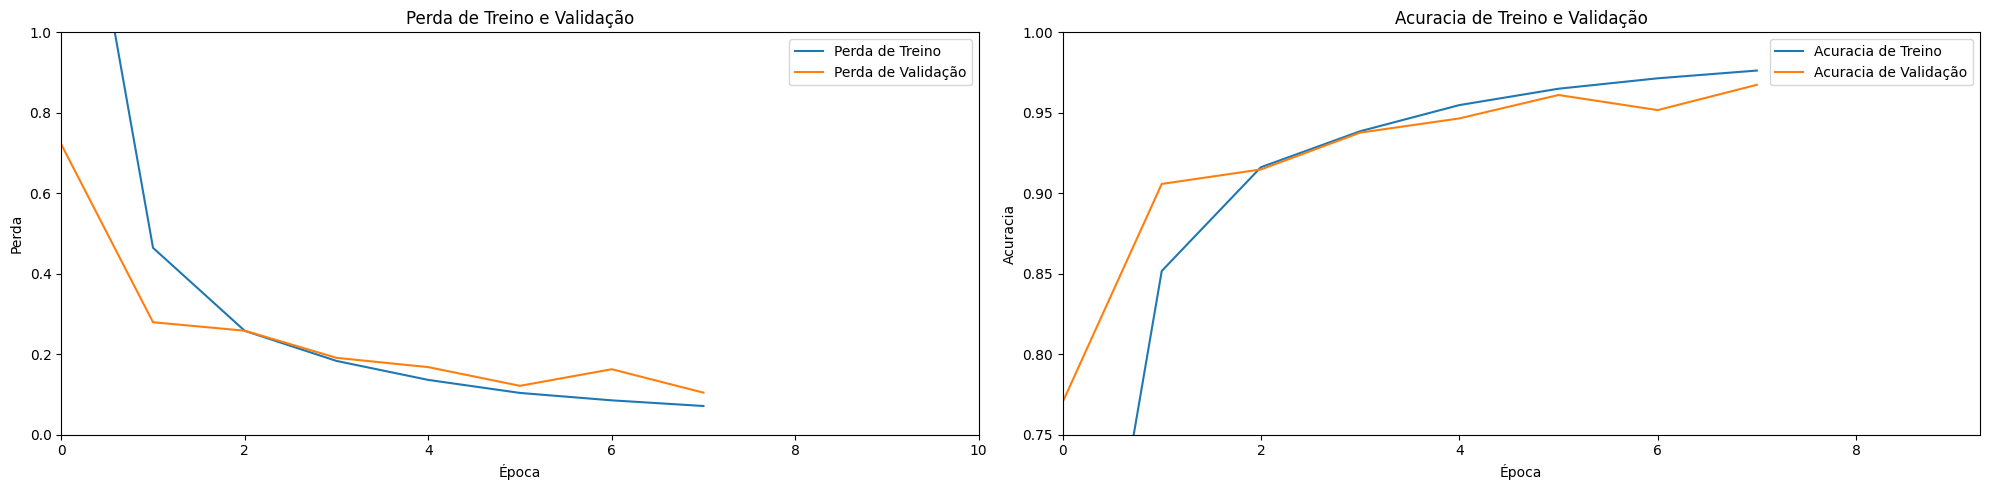

In [6]:
plt.figure(figsize=(20, 5))

# Gráfico de Perda (Loss)
plt.subplot(1, 2, 1)
plt.title("Perda de Treino e Validação")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.plot(historico.history['loss'], label="Perda de Treino")
plt.plot(historico.history['val_loss'], label="Perda de Validação")
plt.xlim(0, 10)
plt.ylim(0.0, 1.0)
plt.legend()

# Gráfico de Precisão (Accuracy)
plt.subplot(1, 2, 2)
plt.title("Acuracia de Treino e Validação")
plt.xlabel("Época")
plt.ylabel("Acuracia")
plt.plot(historico.history['accuracy'], label="Acuracia de Treino")
plt.plot(historico.history['val_accuracy'], label="Acuracia de Validação")
plt.xlim(0, 9.25)
plt.ylim(0.75, 1.0)
plt.legend()

plt.tight_layout()

In [7]:
rotulos = []
previsoes = []

for x, y in gerador_teste:
    rotulos.append(list(y.numpy()))
    previsoes.append(tf.argmax(modelo.predict(x), 1).numpy())


1/1 [==============================] - 0s 119ms/step


In [8]:
previsoes = list(itertools.chain.from_iterable(previsoes))
rotulos = list(itertools.chain.from_iterable(rotulos))

In [9]:
print("Acuracia do Treino: {:.2f} %".format(historico.history['accuracy'][-1] * 100))
print("Acuracia do Teste : {:.2f} %".format(accuracy_score(rotulos, previsoes) * 100))
print("Precisão : {:.2f} %".format(precision_score(rotulos, previsoes, average='micro') * 100))
print("Recall : {:.2f} %".format(recall_score(rotulos, previsoes, average='micro') * 100))

Acuracia do Treino: 97.63 %
Acuracia do Teste : 96.74 %
Precisão : 96.74 %
Recall : 96.74 %


<Figure size 2000x500 with 0 Axes>

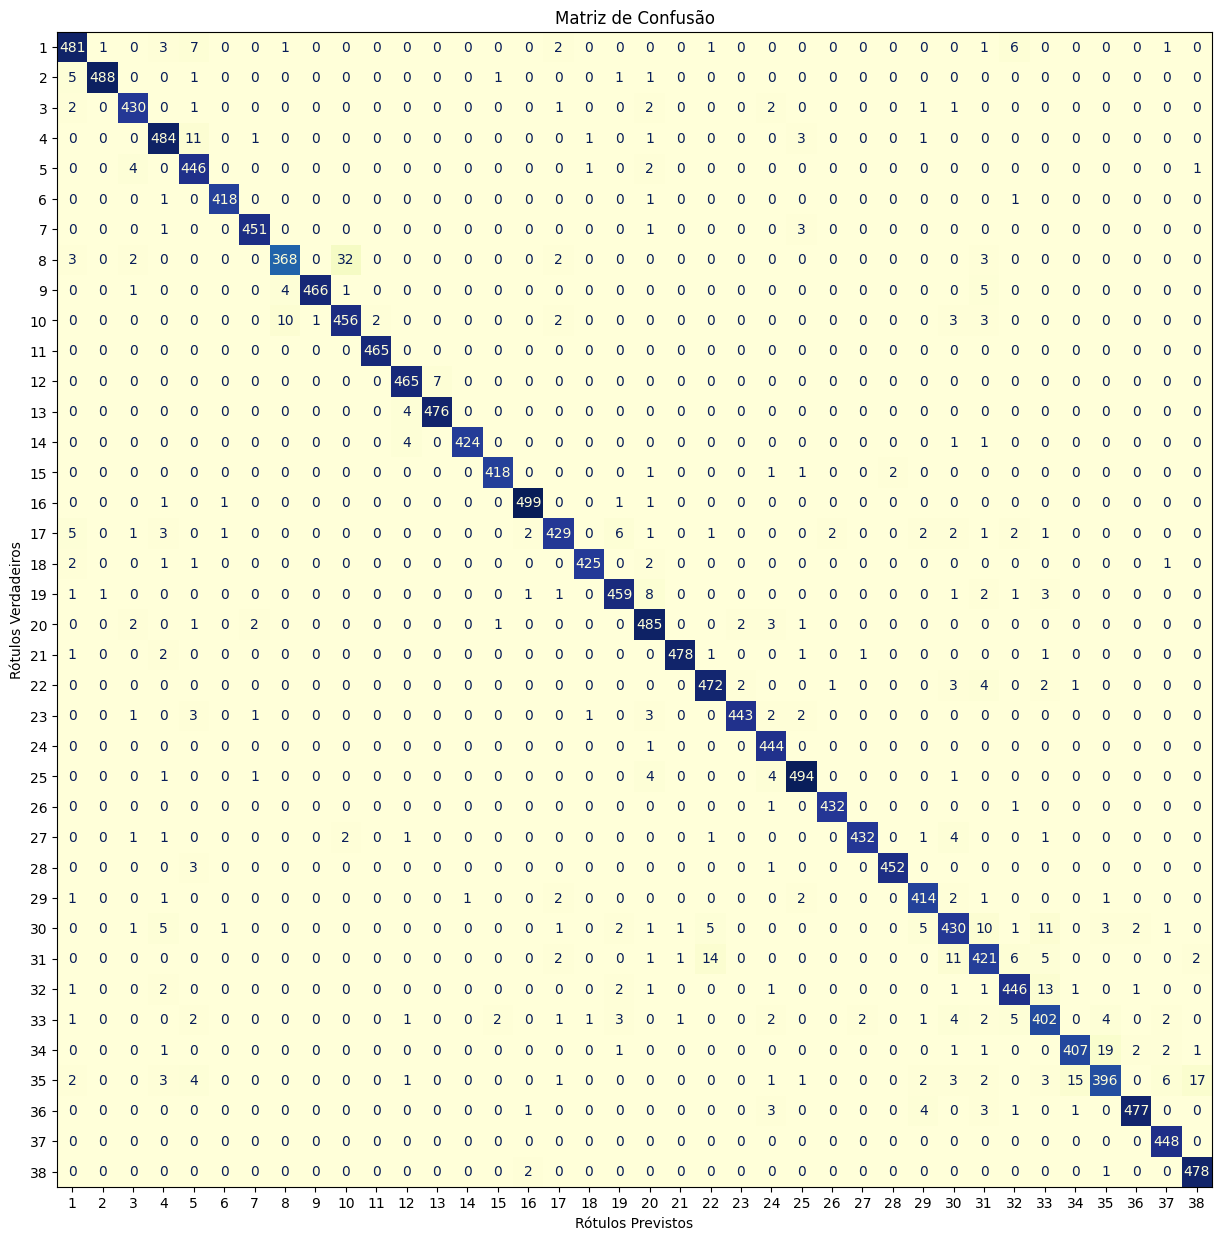

In [10]:
plt.figure(figsize=(20, 5))
cm = confusion_matrix(rotulos, previsoes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1, 39)))
fig, ax = plt.subplots(figsize=(15, 15))
disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')
plt.title("Matriz de Confusão")
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()